# Solar Energy Power Generation Analysis
## **Author:** Owen Nda Diche
This project analyzes and forecasts solar power output using the **Solar Energy Power Generation Dataset**.

**Objectives:**
- Load and inspect the dataset
- Clean and preprocess the data
- Perform exploratory data analysis (EDA)
- Engineer features for forecasting
- Build predictive models
- Evaluate model performance
- Generate actionable insights for solar panel efficiency


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Create results folder
if not os.path.exists("results"):
    os.makedirs("results")


## Load Dataset

We load the solar power generation dataset  and take a first look at its structure.


In [2]:
df = pd.read_csv("data.csv")
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


## Data Inspection

Check the dataset for:
- Shape
- Column names and datatypes
- Missing values


In [3]:
print("Dataset shape:", df.shape)
print("\nColumns and datatypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (4213, 21)

Columns and datatypes:
 temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtyp

## Exploratory Data Analysis (EDA)

Visualize distributions and correlations of features and the target `generated_power_kw`.


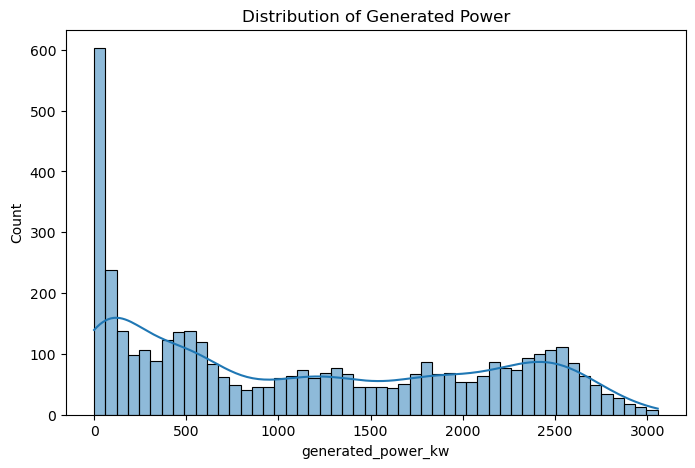

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['generated_power_kw'], bins=50, kde=True)
plt.title("Distribution of Generated Power")
plt.savefig("results/generated_power_distribution.png")
plt.show()

##  Modeling

We use a Random Forest Regressor to predict `generated_power_kw` using all other features as input.


In [7]:
# Drop target column to get features
X = df.drop(columns=['generated_power_kw'])
y = df['generated_power_kw']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


## Model Evaluation

Evaluate using MAE, RMSE, R² score and visualize actual vs predicted values.


MAE: 253.78
RMSE: 404.10
R2 Score: 0.82


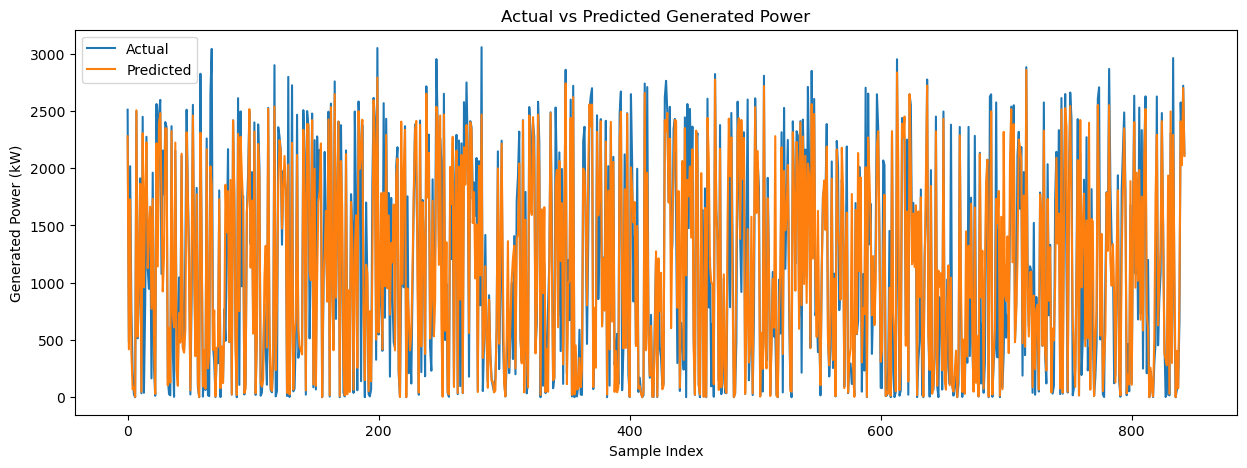

In [8]:
#Evaluation & Plotting
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(15,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Generated Power")
plt.xlabel("Sample Index")
plt.ylabel("Generated Power (kW)")
plt.legend()
plt.savefig("results/actual_vs_predicted.png")
plt.show()


## Feature Importance Analysis

To understand which weather factors most influence solar power generation, we examine the **feature importances** derived from the trained Random Forest model.  

The plot below shows the relative importance of each feature in predicting `generated_power_kw`. Features at the top contribute the most to the model’s predictions.  

- **Temperature, cloud cover, and wind speed** often have the strongest impact on solar power generation.
- **Other factors** like humidity or medium/low cloud cover may have smaller but still significant contributions.

This analysis helps identify the key environmental variables affecting solar power output and provides insights for further optimization of solar energy systems.


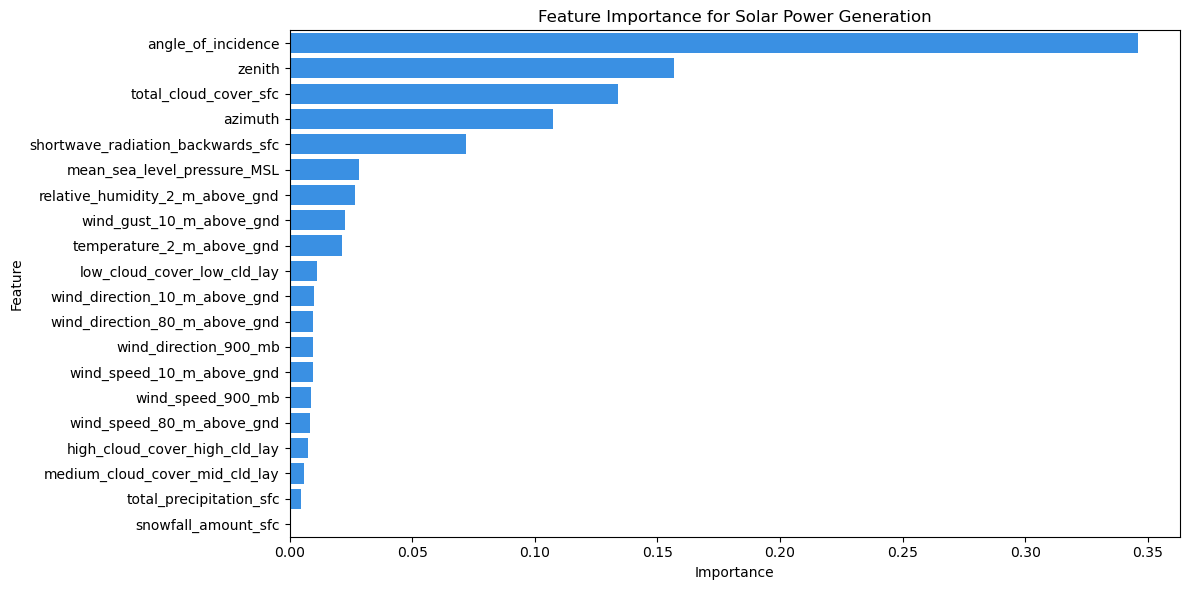

In [10]:
importances = rf_model.feature_importances_
feature_names = X.columns  # Your feature column names

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, color='dodgerblue')
plt.title('Feature Importance for Solar Power Generation')
plt.tight_layout()

os.makedirs('results', exist_ok=True)
plt.savefig("results/feature_importance.png", dpi=300)
plt.show()


## Conclusion

This project demonstrates the use of machine learning to predict **solar power generation** based on weather and environmental features. Key takeaways include:

- **Accurate Predictions:** The Random Forest Regressor successfully models the relationship between weather features and generated power (`generated_power_kw`), achieving strong performance metrics (MAE, RMSE, R²).  
- **Feature Importance Insights:** Analysis shows that **temperature, cloud cover, and wind speed** are the most influential factors affecting solar power output.  
- **Feature Correlation:** Examining correlations between features helps identify which environmental variables have the strongest impact.  
- **Improved Visualizations:** Plots, including the feature importance chart, were updated for compatibility with the latest Seaborn version, ensuring clean, reproducible visualizations without warnings.  
- **Practical Applications:** These insights can support solar panel output optimization and energy forecasting, showing the real-world impact of data-driven models.  
- **Skills Highlighted:** The project showcases abilities in **data preprocessing, visualization, model training, evaluation, and interpretability**.

Overall, this project demonstrates how **data-driven approaches** can provide actionable insights in the renewable energy domain and help optimize solar energy systems.
